In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file paths
touche_file = '../dataset/Touche.csv'
manual_file = '../dataset/manual_topics.csv'
random_file = '../dataset/random.csv'

# Load each CSV into a DataFrame and add a new column for the filename
touche_df = pd.read_csv(touche_file)
touche_df['source_file'] = 'Touche'

manual_df = pd.read_csv(manual_file)
manual_df['source_file'] = 'manual'

random_df = pd.read_csv(random_file)
random_df['source_file'] = 'random'

# Concatenate the DataFrames into one
combined_df = pd.concat([touche_df, manual_df, random_df], ignore_index=True)

# Optionally, save the combined DataFrame to a new CSV file
# combined_df.to_csv('../dataset/combined_files.csv', index=False)

# Display the combined DataFrame
combined_df

,Topic,Sector,source_file
0,Are gas prices too high?,Economy,Touche
1,Should the government allow illegal immigrants...,Politics,Touche
2,Are social media platforms doing enough to pre...,Technology,Touche
3,Is a college education worth it?,Education,Touche
4,Should abortion be legal?,Abortion,Touche
...,...,...,...
85,Do Russians regret the breakup of the Soviet U...,Politics,random
86,Should newspapers shift entirely to digital fo...,Media,random
87,Is anti-Semitism on the rise globally?,Politics,random
88,Is US's economic influence declining globally?,Economy,random


In [12]:
result_path = '../dataset/results/results.csv'

# Load the metadata from the Pew dataset
result_df = pd.read_csv(result_path)
# Drop columns final_answer_gpt and final_answer_lama
result_df = result_df.drop(columns=['final_answer_gpt', 'final_answer_lama'])


# Merge result_df with combined_df on the query and Topic columns
result_df = pd.merge(result_df, combined_df[['Topic', 'source_file']], 
                     left_on='query', right_on='Topic', how='left')
result_df = result_df.drop(columns=['Topic'])

# Saving the new DataFrame to a CSV file
file_path = '../dataset/results/result_df.csv'  # You can modify the file path as needed

result_df.to_csv(file_path, index=False)

result_df

,SL,query,ndcg_metric,top_model,highest_ndcg_score,second_top_model,second_highest_ndcg_score,third_top_model,third_highest_ndcg_score,relevance_gpt,faithfulness_gpt,relevance_lama,faithfulness_lama,annotator_name,scores_equal,Unique_document,source_file
0,1,Are gas prices too high?,_ndcg@1,Clip,1.000000,Mistral-llava,0.833333,Mistral,0.833333,3,3,3,3,Pranay Karani,NaN,14,Touche
1,2,Are gas prices too high?,_ndcg@2,Qwen2,0.821847,Mistral,0.752928,Mistral-llava,0.684009,3,3,3,3,Pranay Karani,NaN,14,Touche
2,3,Are gas prices too high?,_ndcg@3,Mistral,0.886876,Qwen2,0.853789,Mistral-llava,0.561368,3,3,3,3,Pranay Karani,NaN,14,Touche
3,4,Should the government allow illegal immigrants...,_ndcg@1,Clip,1.000000,Mistral-llava,1.000000,Mistral,0.800000,3,3,3,3,Pranay Karani,1&2,7,Touche
4,5,Should the government allow illegal immigrants...,_ndcg@2,Mistral-llava,1.000000,Clip,0.922629,Mistral,0.877371,3,3,3,3,Pranay Karani,NaN,7,Touche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,Should health and fitness apps be free to down...,_ndcg@2,Qwen2,0.795618,BM25,0.795618,Mistral,0.666667,3,2,3,3,Nikhil,1&2,10,random
176,177,Should health and fitness apps be free to down...,_ndcg@3,Qwen2,0.915151,BM25,0.745452,Mistral,0.638384,3,2,3,3,Nikhil,NaN,10,random
177,178,Are women more likely to use Instagram than men?,_ndcg@1,Mistral-llava,1.000000,Mistral,0.833333,Qwen2,0.833333,3,3,3,3,Nikhil,NaN,13,random
178,179,Are women more likely to use Instagram than men?,_ndcg@2,Mistral-llava,0.931081,Mistral,0.890766,Qwen2,0.890766,3,3,3,2,Nikhil,NaN,13,random


In [13]:
import pandas as pd

def aggregate_gpt_lama_values(df):
    """
    Function to aggregate mean Relevance and Faithfulness values for GPT and Lama models across NDCG@1, NDCG@2, and NDCG@3.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the relevance and faithfulness scores.
        
    Returns:
        pd.DataFrame: Aggregated mean relevance and faithfulness values for GPT and Lama across NDCG levels.
    """
    # Filter the DataFrame for NDCG@1, NDCG@2, and NDCG@3
    df_ndcg1 = df[df['ndcg_metric'] == '_ndcg@1']
    df_ndcg2 = df[df['ndcg_metric'] == '_ndcg@2']
    df_ndcg3 = df[df['ndcg_metric'] == '_ndcg@3']

    # Define the aggregation for GPT and Lama relevance and faithfulness
    aggregated_data = {
        "Row Labels": ["GPT Relevance", "GPT Faithfulness", "Lama Relevance", "Lama Faithfulness"],
        "_ndcg@1": [
            df_ndcg1["relevance_gpt"].mean(),  # GPT Relevance for NDCG@1
            df_ndcg1["faithfulness_gpt"].mean(),  # GPT Faithfulness for NDCG@1
            df_ndcg1["relevance_lama"].mean(),  # Lama Relevance for NDCG@1
            df_ndcg1["faithfulness_lama"].mean()  # Lama Faithfulness for NDCG@1
        ],
        "_ndcg@2": [
            df_ndcg2["relevance_gpt"].mean(),  # GPT Relevance for NDCG@2
            df_ndcg2["faithfulness_gpt"].mean(),  # GPT Faithfulness for NDCG@2
            df_ndcg2["relevance_lama"].mean(),  # Lama Relevance for NDCG@2
            df_ndcg2["faithfulness_lama"].mean()  # Lama Faithfulness for NDCG@2
        ],
        "_ndcg@3": [
            df_ndcg3["relevance_gpt"].mean(),  # GPT Relevance for NDCG@3
            df_ndcg3["faithfulness_gpt"].mean(),  # GPT Faithfulness for NDCG@3
            df_ndcg3["relevance_lama"].mean(),  # Lama Relevance for NDCG@3
            df_ndcg3["faithfulness_lama"].mean()  # Lama Faithfulness for NDCG@3
        ]
    }

    # Convert to DataFrame for a clean display
    df_aggregated = pd.DataFrame(aggregated_data)
    return df_aggregated


# Assuming df is your dataset
df_aggregated = aggregate_gpt_lama_values(result_df)
print('Mean relevance and faithfulness values for GPT and Lama models across NDCG levels:')
print(df_aggregated)

Mean relevance and faithfulness values for GPT and Lama models across NDCG levels:
          Row Labels   _ndcg@1   _ndcg@2   _ndcg@3
0      GPT Relevance  2.783333  2.900000  2.916667
1   GPT Faithfulness  2.666667  2.600000  2.733333
2     Lama Relevance  2.750000  2.850000  2.900000
3  Lama Faithfulness  2.266667  2.416667  2.383333


In [14]:
# Filter the dataset for 'Touche' in the source_file column
df_touche = result_df[result_df['source_file'].str.contains("Touche", case=False, na=False)]

# Aggregate NDCG values for the filtered dataset
df_aggregated_touche = aggregate_gpt_lama_values(df_touche)

# Print the results
print('Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on Touche queries:')
print(df_aggregated_touche)

#print a space of 2 lines
print('\n')

# Filter the dataset for 'Touche' in the source_file column
df_manual = result_df[result_df['source_file'].str.contains("manual", case=False, na=False)]
# Aggregate NDCG values for the filtered dataset
df_aggregated_manual = aggregate_gpt_lama_values(df_manual)
# Print the results
print('Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on manual queries:')
print(df_aggregated_manual)

#print the same for random queries
print('\n')
df_random = result_df[result_df['source_file'].str.contains("random", case=False, na=False)]
df_aggregated_random = aggregate_gpt_lama_values(df_random)
print('Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on random queries:')
print(df_aggregated_random)

Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on Touche queries:
          Row Labels  _ndcg@1  _ndcg@2  _ndcg@3
0      GPT Relevance     2.75     2.80     2.85
1   GPT Faithfulness     2.75     2.55     2.70
2     Lama Relevance     2.70     2.70     2.75
3  Lama Faithfulness     2.40     2.35     2.60


Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on manual queries:
          Row Labels  _ndcg@1  _ndcg@2  _ndcg@3
0      GPT Relevance     2.80     2.90     3.00
1   GPT Faithfulness     2.60     2.75     2.80
2     Lama Relevance     2.75     2.85     2.95
3  Lama Faithfulness     2.35     2.50     2.25


Mean relevance and faithfulness values for GPT and Lama models across NDCG levels on random queries:
          Row Labels  _ndcg@1  _ndcg@2  _ndcg@3
0      GPT Relevance     2.80      3.0      2.9
1   GPT Faithfulness     2.65      2.5      2.7
2     Lama Relevance     2.80      3.0      3.0
3  Lama Faithfulness 

In [16]:
import pandas as pd

def count_faithfulness_3(df):
    """
    Function to count occurrences where the faithfulness score is 3 for GPT and Lama models across NDCG@1, NDCG@2, and NDCG@3.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the faithfulness scores.
        
    Returns:
        pd.DataFrame: Counts of faithfulness score 3 for GPT and Lama across NDCG levels.
    """
    # Filter the DataFrame for NDCG@1, NDCG@2, and NDCG@3
    df_ndcg1 = df[df['ndcg_metric'] == '_ndcg@1']
    df_ndcg2 = df[df['ndcg_metric'] == '_ndcg@2']
    df_ndcg3 = df[df['ndcg_metric'] == '_ndcg@3']

    # Count the occurrences where the faithfulness score is 3 for GPT and Lama models
    count_data = {
        "Row Labels": ["GPT Faithfulness", "Lama Faithfulness"],
        "_ndcg@1": [
            (df_ndcg1['faithfulness_gpt'] == 3).sum(),  # Count GPT Faithfulness score 3 for NDCG@1
            (df_ndcg1['faithfulness_lama'] == 3).sum()  # Count Lama Faithfulness score 3 for NDCG@1
        ],
        "_ndcg@2": [
            (df_ndcg2['faithfulness_gpt'] == 3).sum(),  # Count GPT Faithfulness score 3 for NDCG@2
            (df_ndcg2['faithfulness_lama'] == 3).sum()  # Count Lama Faithfulness score 3 for NDCG@2
        ],
        "_ndcg@3": [
            (df_ndcg3['faithfulness_gpt'] == 3).sum(),  # Count GPT Faithfulness score 3 for NDCG@3
            (df_ndcg3['faithfulness_lama'] == 3).sum()  # Count Lama Faithfulness score 3 for NDCG@3
        ]
    }

    # Convert to DataFrame for a clean display
    df_count = pd.DataFrame(count_data)
    return df_count


# Assuming result_df is your dataset
df_faithfulness_3 = count_faithfulness_3(result_df)
print('Number of times the faithfulness score was 3 for GPT and Lama models across NDCG levels:')
print(df_faithfulness_3)

Number of times the faithfulness score was 3 for GPT and Lama models across NDCG levels:
          Row Labels  _ndcg@1  _ndcg@2  _ndcg@3
0   GPT Faithfulness       45       41       44
1  Lama Faithfulness       25       31       28


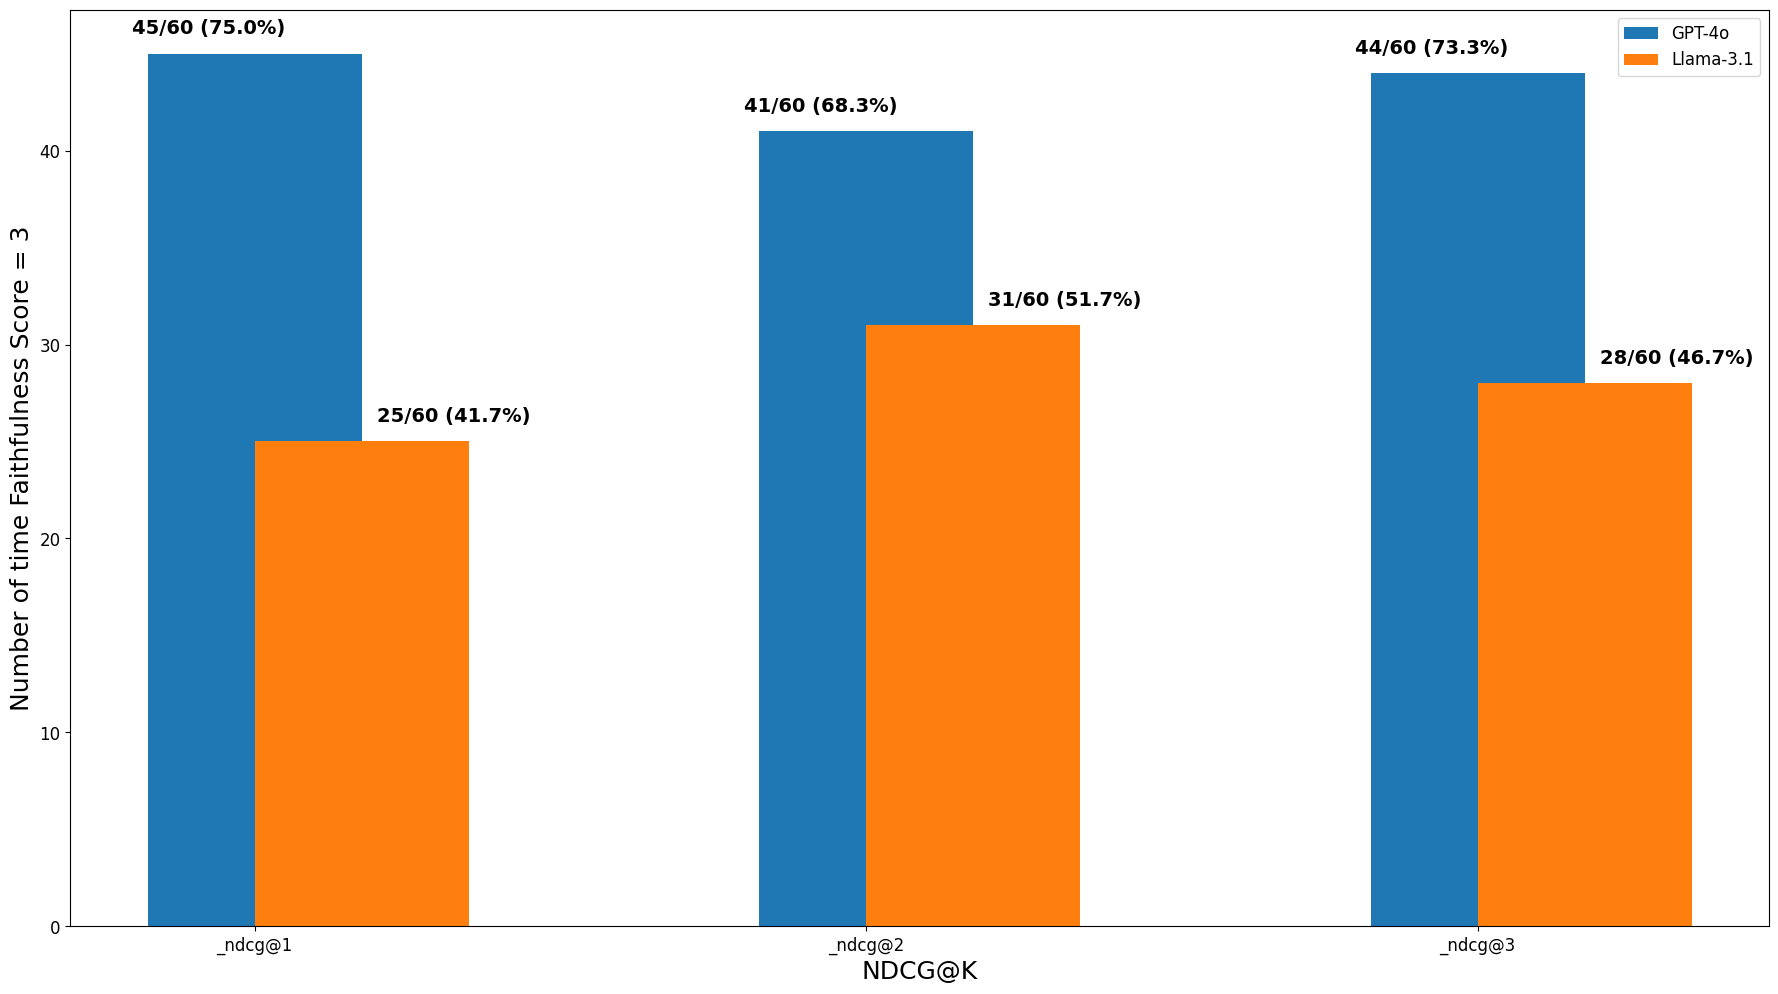

<Figure size 640x480 with 0 Axes>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming this function counts the faithfulness score 3 occurrences
def count_faithfulness_3(df):
    """
    Function to count occurrences where the faithfulness score is 3 for GPT and Lama models across NDCG@1, NDCG@2, and NDCG@3.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the faithfulness scores.
        
    Returns:
        pd.DataFrame: Counts of faithfulness score 3 for GPT and Lama across NDCG levels.
    """
    df_ndcg1 = df[df['ndcg_metric'] == '_ndcg@1']
    df_ndcg2 = df[df['ndcg_metric'] == '_ndcg@2']
    df_ndcg3 = df[df['ndcg_metric'] == '_ndcg@3']

    count_data = {
        "Row Labels": ["GPT Faithfulness", "Lama Faithfulness"],
        "_ndcg@1": [
            (df_ndcg1['faithfulness_gpt'] == 3).sum(),
            (df_ndcg1['faithfulness_lama'] == 3).sum()
        ],
        "_ndcg@2": [
            (df_ndcg2['faithfulness_gpt'] == 3).sum(),
            (df_ndcg2['faithfulness_lama'] == 3).sum()
        ],
        "_ndcg@3": [
            (df_ndcg3['faithfulness_gpt'] == 3).sum(),
            (df_ndcg3['faithfulness_lama'] == 3).sum()
        ]
    }

    df_count = pd.DataFrame(count_data)
    return df_count

# Plotting function
def plot_faithfulness_3(df_count, total_responses=60):
    """
    Function to plot the number of times the faithfulness score was 3 for GPT and Lama models across NDCG levels.
    
    Parameters:
        df_count (pd.DataFrame): DataFrame containing the counts of faithfulness scores.
        total_responses (int): The total number of responses, used to calculate percentages.
    """
    ndcg_levels = ['_ndcg@1', '_ndcg@2', '_ndcg@3']
    gpt_values = df_count.loc[df_count['Row Labels'] == 'GPT Faithfulness', ndcg_levels].values.flatten()
    lama_values = df_count.loc[df_count['Row Labels'] == 'Lama Faithfulness', ndcg_levels].values.flatten()

    # Convert to percentages
    gpt_percentages = (gpt_values / total_responses) * 100
    lama_percentages = (lama_values / total_responses) * 100

    plt.figure(figsize=(18, 10))

    # Plot GPT values
    plt.bar(ndcg_levels, gpt_values, width=0.35, label='GPT-4o', align='center')
    # Plot Lama values
    plt.bar(ndcg_levels, lama_values, width=0.35, label='Llama-3.1', align='edge')

    # Add percentage labels on top of bars
    for i, value in enumerate(gpt_values):
        plt.text(i - 0.2, value + 1, f'{value}/{total_responses} ({gpt_percentages[i]:.1f}%)', ha='left',fontsize=14, fontweight='bold')
    for i, value in enumerate(lama_values):
        plt.text(i + 0.2, value + 1, f'{value}/{total_responses} ({lama_percentages[i]:.1f}%)', ha='left',fontsize=14, fontweight='bold')

    # Labels and title
    plt.xlabel('NDCG@K', fontsize=18)
    plt.ylabel('Number of time Faithfulness Score = 3', fontsize=18)
    plt.legend()
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()


# Assuming result_df is your dataset
df_faithfulness_3 = count_faithfulness_3(result_df)

# Uncomment the line below in your environment after generating df_faithfulness_3
plot_faithfulness_3(df_faithfulness_3)

# Save the plot to a file outside the function
filename = '../dataset/results/faithfulness3.png'
plt.savefig(filename, format='png')